In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import settings
from scipy.stats import pearsonr, t

'''
Part 7

Different analysis and plots based on return_result.xlsx
'''

df= pd.read_excel(settings.csv_path+'/return_result.xlsx', index_col=0)
df=df[['filingDate', 'reportDate', 'tone','abnormal_return', '% negative', '% positive', '% uncertainty', 'number of words', 'ticker'] ]

In [17]:
print(t.ppf(1-0.05, 999))

1.646380345427535


In [18]:
#10-Ks in sample

print('Number of 10-Ks:', len(df))

#Total number of words

print('Total number of words:', df['number of words'].sum())

#Mean
print('\nMean:')
print('net tone:',round(df['tone'].mean(),4))
print('% negative:',round(df['% negative'].mean(),4))
print('% positive:',round(df['% positive'].mean(),4))
print('% uncertainty:',round(df['% uncertainty'].mean(),4))
print('number of words:',round(df['number of words'].mean(),4))

#Median
print('\nMedian:')
print('net tone:',round(df['tone'].median(),4))
print('% negative:',round(df['% negative'].median(),4))
print('% positive:',round(df['% positive'].median(),4))
print('% uncertainty:',round(df['% uncertainty'].median(),4))
print('number of words:',round(df['number of words'].median(),4))


Number of 10-Ks: 4091
Total number of words: 189370961

Mean:
net tone: -0.3868
% negative: 2.201
% positive: 0.9528
% uncertainty: 1.8963
number of words: 46289.6507

Median:
net tone: -0.3908
% negative: 2.1523
% positive: 0.9435
% uncertainty: 1.8911
number of words: 42922.0


In [29]:
#Correaltions

def significancetest(data, var1, var2, alpha):  #Two sided ssignificance test for zero population correlation
    r,p= pearsonr(data[var1], data[var2])
    n=len(data)
    tstat=(r*(n-2)**0.5)/(1-r**2)**0.5
    ts= t.ppf(1-(alpha/2), n)
    issignificant=False
    if tstat<-ts or tstat>ts: 
        issignificant= True
    return 'r:'+str(round(r,4))+ '; p:'+ str(round(p,4)),'; t:'+ str(round(tstat,4))+' ;required t for '+str(alpha)+' significance :'+ str(ts) +' ;significant='+ str(issignificant)



#Best tone 
print('Correlation abnormal return and different tones:')
print('abnormal return - net tone', significancetest(df, 'abnormal_return', 'tone', 0.05))
print('abnormal return - negative tone',significancetest(df, 'abnormal_return', '% negative', 0.05))
print('abnormal return - positive tone',significancetest(df, 'abnormal_return', '% positive', 0.05))


print('negative tone - net tone',pearsonr(df['% negative'],df['tone']))

#Tone by year of filing
print('Tone by year of filing:')
df["filingDate"] = pd.to_datetime(df["filingDate"])
for year in range(2010,2022):
    df1 = df[df['filingDate'].dt.year == year]
    print(year, ': abnormal return - tone: ',pearsonr(df1['abnormal_return'],df1['% negative']), 'based on ', len(df1), 'filings')

#number of words - tone

print('Correlation number of words - tone:',round(df['number of words'].corr(df['% negative']),4))


Correlation abnormal return and different tones:
abnormal return - net tone ('r:-0.0122; p:0.4353', '; t:-0.7802 ;required t for 0.05 significance:1.9605440288597336 ;significant=False')
abnormal return - negative tone ('r:0.0131; p:0.4024', '; t:0.8375 ;required t for 0.05 significance:1.9605440288597336 ;significant=False')
abnormal return - positive tone ('r:-0.0043; p:0.7827', '; t:-0.2759 ;required t for 0.05 significance:1.9605440288597336 ;significant=False')
negative tone - net tone (-0.6885801768948907, 0.0)
Tone by year of filing:
2010 : abnormal return - tone:  (-0.353899041933851, 0.2590745889293796) based on  12 filings
2011 : abnormal return - tone:  (-0.07920933166486883, 0.3487489513509059) based on  142 filings
2012 : abnormal return - tone:  (-0.003979861483189054, 0.9547249082934941) based on  206 filings
2013 : abnormal return - tone:  (-0.049726585929557206, 0.4157573187359923) based on  270 filings
2014 : abnormal return - tone:  (0.030788763242638663, 0.578476678

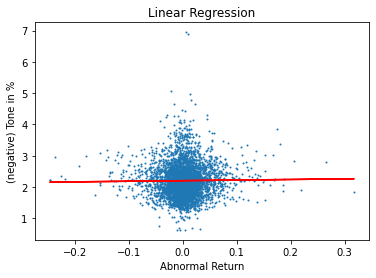

In [20]:
#Linear Regression abnormal return-tone
X = df.loc[:, 'abnormal_return'].values.reshape(-1, 1) 
Y = df.loc[:, '% negative'].values.reshape(-1, 1) 
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y, s=1)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Abnormal Return')
plt.ylabel('(negative) Tone in %')
plt.title('Linear Regression')
plt.show()

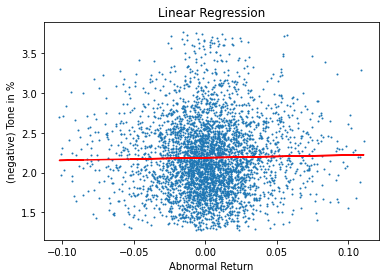

correlation without top and bottom extrem values: 0.02060218599619685


In [21]:
df1=df[(df['% negative']<df['% negative'].quantile(0.99)) & (df['% negative']>df['% negative'].quantile(0.01))]
df1=df1[(df1['abnormal_return']<df1['abnormal_return'].quantile(0.99)) & (df1['abnormal_return']>df1['abnormal_return'].quantile(0.01))]
X = df1.loc[:, 'abnormal_return'].values.reshape(-1, 1)
Y = df1.loc[:, '% negative'].values.reshape(-1, 1)  
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y, s=1)

plt.plot(X, Y_pred, color='red')
plt.xlabel('Abnormal Return')
plt.ylabel('(negative) Tone in %')
plt.title('Linear Regression')
plt.show()

print('correlation without top and bottom extrem values:', df1['abnormal_return'].corr(df1['% negative']))


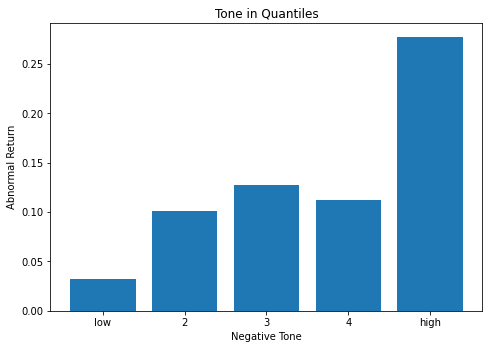

1.611366850216963
2.8352425492383437


In [22]:
df01=df[df['% negative']<df['% negative'].quantile(0.2)]
df02=df[(df['% negative']>df['% negative'].quantile(0.2)) & (df['% negative']<df['% negative'].quantile(0.4))]
df03=df[(df['% negative']>df['% negative'].quantile(0.4)) & (df['% negative']<df['% negative'].quantile(0.6))]
df04=df[(df['% negative']>df['% negative'].quantile(0.6)) & (df['% negative']<df['% negative'].quantile(0.8))]
df05=df[(df['% negative']>df['% negative'].quantile(0.8))]
bars=np.array([df01['abnormal_return'].median(),df02['abnormal_return'].median(), df03['abnormal_return'].median(), df04['abnormal_return'].median(), df05['abnormal_return'].median()])*100
label=['low', '2', '3', '4', 'high']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,bars)
ax.set_xlabel('Negative Tone')
ax.set_ylabel('Abnormal Return')
ax.set_title('Tone in Quantiles')
plt.show()
print(df01['% negative'].median())
print(df05['% negative'].median())

mean: -0.3868
standard deviation: 0.1226


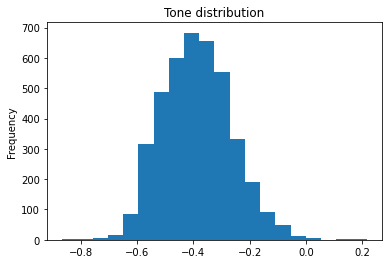

In [23]:
#Distributions
#df_return=df[(df['abnormal_return']>df['abnormal_return'].quantile(0.1)) & (df['abnormal_return']<df['abnormal_return'].quantile(0.9))]
#df_return['abnormal_return'].plot.hist(bins=20, title="abnormal return distribution", sharex= True)
#print('mean:',round(df['tone'].mean(),4))
#print('standard deviation:',round(df['tone'].std(),4))

#Distributions
df['tone'].plot.hist(bins=20, title="Tone distribution", sharex= True)
print('mean:',round(df['tone'].mean(),4))
print('standard deviation:',round(df['tone'].std(),4))

<AxesSubplot:title={'center':'Distribution of negative words'}, xlabel='Top 100 words', ylabel='frequency'>

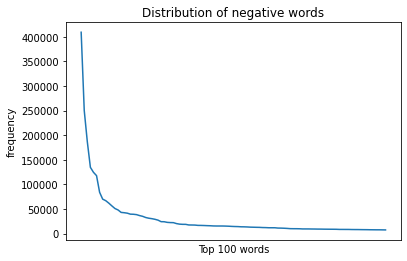

In [24]:
import settings
df2= pd.read_excel(settings.csv_path+'/text_statistic.xlsx', index_col=0,sheet_name='Only negative')
df2['percent'] = (df2['word'] / df2['word'].sum()) * 100
df3=df2.head(100)
df3['word'].plot(xticks=[], xlabel='Top 100 words',ylabel='frequency', title='Distribution of negative words')

Tone by year of filing:


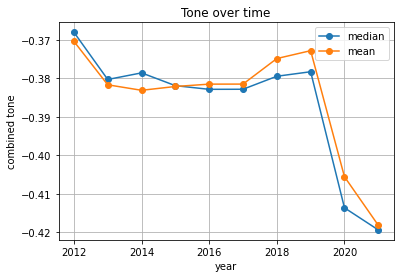

Average tone before March 2020: -0.3813
Average abnormal return before March 2020: 0.0026
Average tone since March 2020: -0.4203
Average abnormal return since March 2020: -0.0003
Correlation pre_covid abnormal return - tone: 0.0118
Correlation covid abnormal return - tone: 0.0828
Correlation  abnormal return - tone: 0.0118


In [25]:
#Tone by year of filing
print('Tone by year of filing:')
df["filingDate"] = pd.to_datetime(df["filingDate"])
year_list=[]
tone_median_list=[]
tone_mean_list=[]
for year in range(2012,2022):
    df1 = df[df['filingDate'].dt.year == year]
    year_list.append(year)
    tone_mean_list.append(df1['tone'].mean())
    tone_median_list.append(df1['tone'].median())

  
plt.plot(year_list, tone_median_list, marker='o', label="median")
plt.plot(year_list, tone_mean_list, marker='o', label= "mean")
plt.title('Tone over time')
plt.ylabel('combined tone')
plt.xlabel('year')
plt.legend()
plt.grid()
plt.show()

df_precovid=df.loc[(df['reportDate'] < '2020-03-1')& (df['reportDate'] > '2012-01-1')]
print('Average tone before March 2020:',round(df_precovid['tone'].mean(),4))
print('Average abnormal return before March 2020:',round(df.loc[(df['reportDate'] < '2020-03-1')]['abnormal_return'].mean(),4))
df_covid= df.loc[(df['reportDate'] > '2020-03-1')]
print('Average tone since March 2020:', round(df_covid['tone'].mean(),4))
print('Average abnormal return since March 2020:', round(df_covid['abnormal_return'].mean(),4))
print('Correlation pre_covid abnormal return - tone:',round(df_precovid['abnormal_return'].corr(df_precovid['% negative']),4))
print('Correlation covid abnormal return - tone:',round(df_covid['abnormal_return'].corr(df_covid['% negative']),4))
print('Correlation  abnormal return - tone:',round(df_precovid['abnormal_return'].corr(df_precovid['% negative']),4))

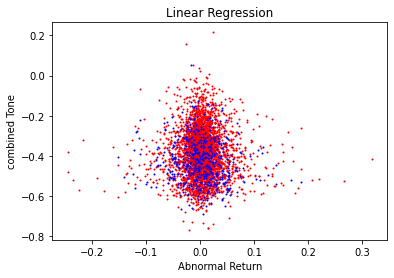

In [26]:
#Comparsion Data before Covid after Covid
X1 = df_precovid.loc[:, 'abnormal_return'].values.reshape(-1, 1) 
Y1 = df_precovid.loc[:, 'tone'].values.reshape(-1, 1)
X2 = df_covid.loc[:, 'abnormal_return'].values.reshape(-1, 1) 
Y2 = df_covid.loc[:, 'tone'].values.reshape(-1, 1) 

plt.scatter(X1, Y1, s=1, color='r')
plt.scatter(X2, Y2, s=1, color='b')
plt.xlabel('Abnormal Return')
plt.ylabel('combined Tone')
plt.title('Linear Regression')
plt.show()

Abnormal return by year of filing:


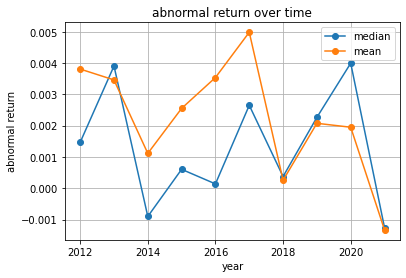

abnormal return mean: 0.0022
abnormal return median: 0.0013
abnormal return mean min, max: -0.0013 0.005
abnormal return median min, max: -0.0013 0.004


In [27]:
#abnormal return by year of filing
print('Abnormal return by year of filing:')
df["filingDate"] = pd.to_datetime(df["filingDate"])
year_list=[]
return_median_list=[]
return_mean_list=[]
for year in range(2012,2022):
    df1 = df[df['filingDate'].dt.year == year]
    year_list.append(year)
    return_mean_list.append(df1['abnormal_return'].mean())
    return_median_list.append(df1['abnormal_return'].median())

  
plt.plot(year_list, return_median_list, marker='o', label="median")
plt.plot(year_list, return_mean_list, marker='o', label= "mean")
plt.title('abnormal return over time')
plt.ylabel('abnormal return')
plt.xlabel('year')
plt.legend()
plt.grid()
plt.show()
print('abnormal return mean:', round(df['abnormal_return'].mean(),4))
print('abnormal return median:', round(df['abnormal_return'].median(),4))
print('abnormal return mean min, max:', round(min(return_mean_list),4), round(max(return_mean_list),4))
print('abnormal return median min, max:', round(min(return_median_list),4), round(max(return_median_list),4))

doc lenght by year of filing:


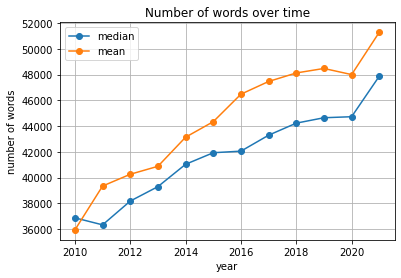

In [28]:
#doc lenght by year of filing
print('doc lenght by year of filing:')
df["filingDate"] = pd.to_datetime(df["filingDate"])
year_list=[]
lenght_median_list=[]
lenght_mean_list=[]
for year in range(2010,2022):
    df1 = df[df['filingDate'].dt.year == year]
    year_list.append(year)
    lenght_mean_list.append(df1['number of words'].mean())
    lenght_median_list.append(df1['number of words'].median())

  
plt.plot(year_list, lenght_median_list, marker='o', label="median")
plt.plot(year_list, lenght_mean_list, marker='o', label= "mean")
plt.title('Number of words over time')
plt.ylabel('number of words')
plt.xlabel('year')
plt.legend()
plt.grid()
plt.show()
